# Introduction to categorical plots using Seaborn

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

reviews = pd.read_csv("data/lasvegas_tripadvisor.csv")

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [12]:
reviews["Score"].value_counts()

Score
5    227
4    164
3     72
2     30
1     11
Name: count, dtype: int64

## Box plot example

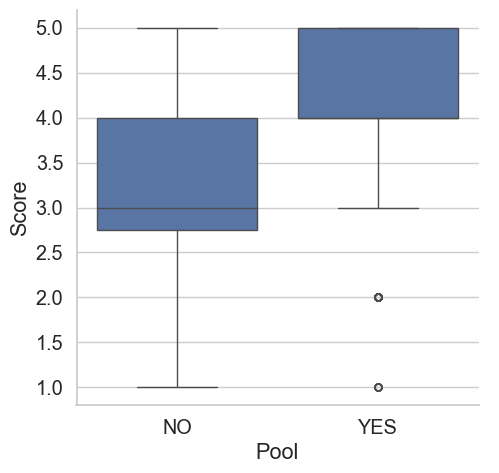

In [13]:
sns.catplot(
x="Pool",
y="Score",
data=reviews,
kind="box"
)
plt.show()

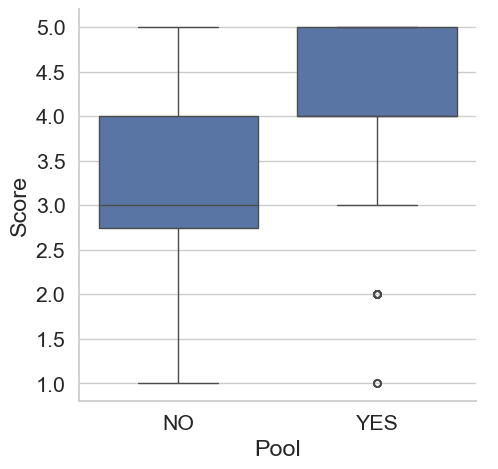

In [14]:
# Setting font size and plot background
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(
x="Pool",
y="Score",
data=reviews,
kind="box"
)
plt.show()

C:\Users\kurba\AppData\Local\Temp\ipykernel_42592\2985101487.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


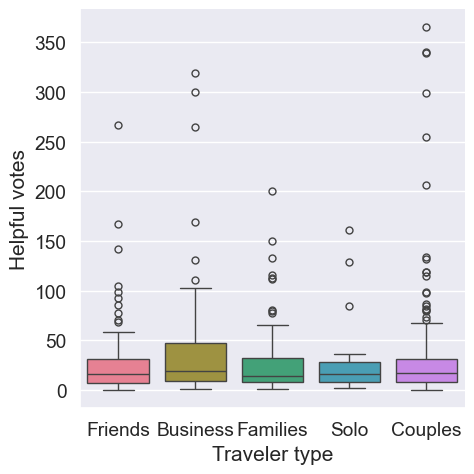

In [15]:
sns.set_palette("husl")
# Set the font size to 1.25
sns.set(font_scale=1.25)

# Set the background to "darkgrid"
sns.set_style("darkgrid")

# Create a boxplot
sns.catplot(
    data=reviews, 
    x="Traveler type", 
    y="Helpful votes", 
    kind="box",
    palette="husl"
)

plt.show()

# Seaborn bar plots

## Traditional bar chart

<Axes: xlabel='Traveler type'>

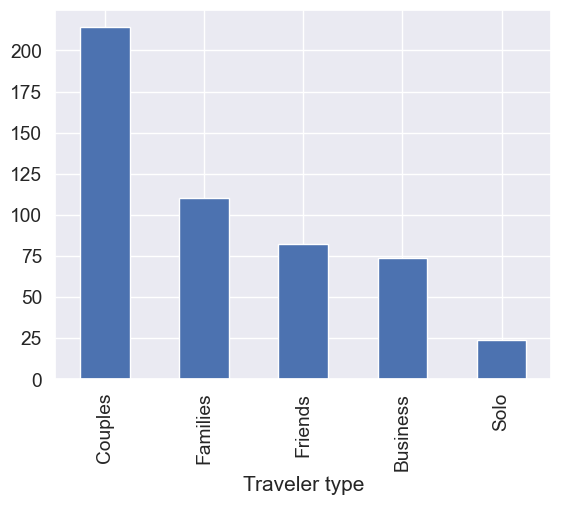

In [16]:
reviews["Traveler type"].value_counts().plot.bar()

## The syntax

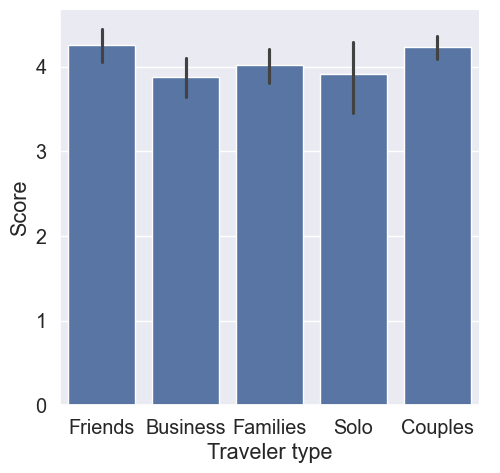

In [17]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.catplot(x="Traveler type", y="Score", data=reviews, kind="bar")

## Ordering your categories

In [20]:
reviews["Traveler type"] = reviews["Traveler type"].astype("category")
reviews["Traveler type"].cat.categories

Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')

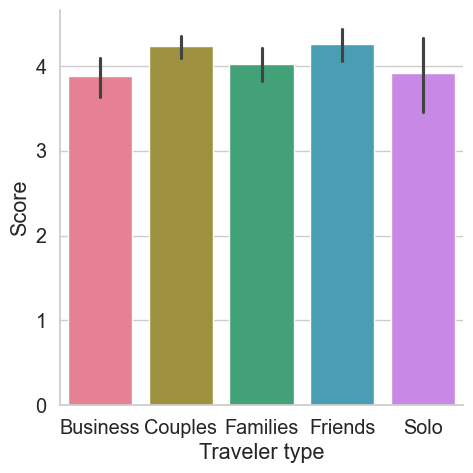

In [27]:
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.3)
sns.catplot(
    x="Traveler type",
    y="Score",
    data=reviews,
    kind="bar",
    hue="Traveler type",   # Assign x variable to hue
    palette="husl",
    legend=False           # Hide the legend
)

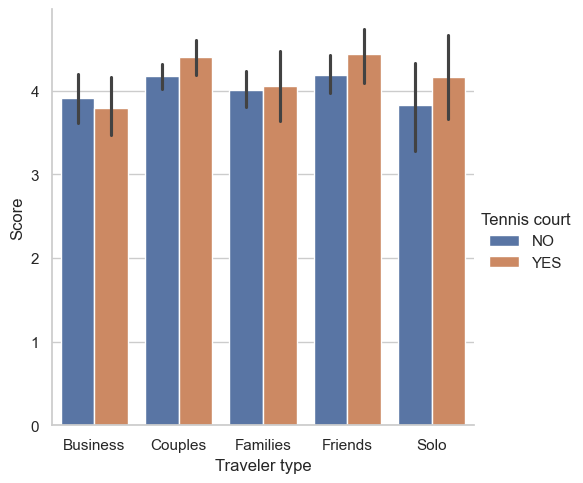

In [31]:
sns.set_theme(style="whitegrid", context="notebook", font_scale=1)
sns.catplot(
    x="Traveler type", 
    y="Score", 
    data=reviews, 
    kind="bar",
    hue="Tennis court") # <--- new parameter

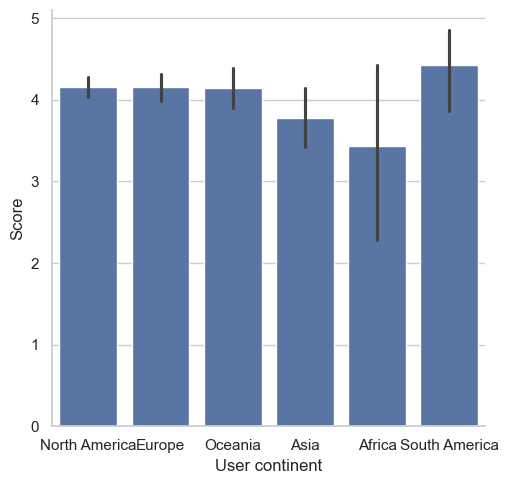

In [33]:
sns.set_theme(style="whitegrid", context="notebook", font_scale=1)
# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype("category")

# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(
    new_categories=continent_categories, 
    ordered=False)
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()

## Point plot example


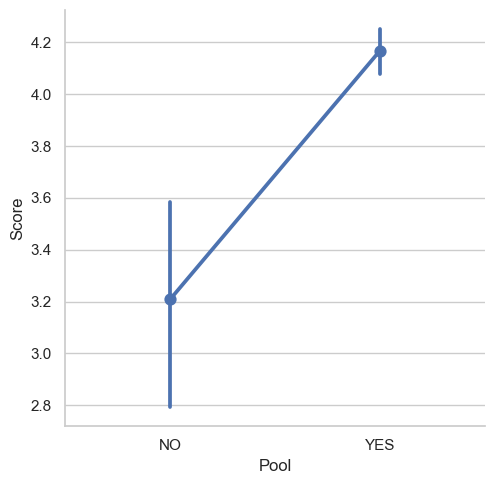

In [34]:
sns.catplot(x="Pool", y="Score", data=reviews, kind="point") # <--- updated

## Point plot with hue
dodge=True
The dodge parameter, when set to True, separates the points for different hue levels along the categorical axis. This helps in better visualizing the differences between groups.  
the lines and points don't overlap

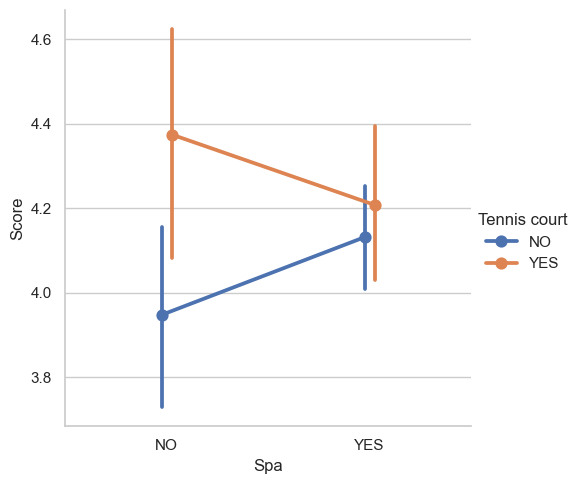

In [37]:
sns.catplot(
    x="Spa", 
    y="Score", 
    data=reviews, 
    kind="point",
    hue="Tennis court", 
    dodge=True # < --- New Parameter!
)

## Using the join parameter
linestyle='none' # < --- new method (for line between points)

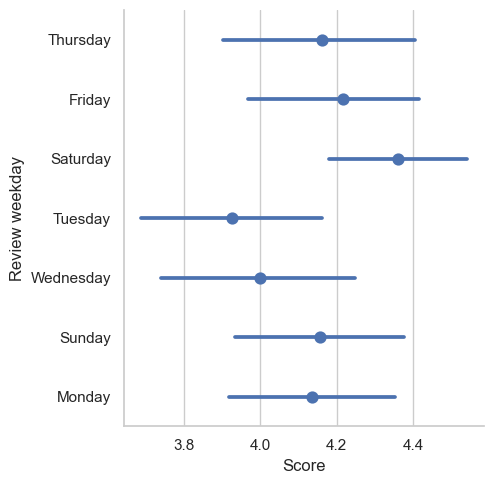

In [ ]:
sns.catplot(x="Score",
y="Review weekday",
data=reviews,
kind="point",
#join=False, # < --- depricated method
linestyle='none' # < --- new method
)

## Count plot

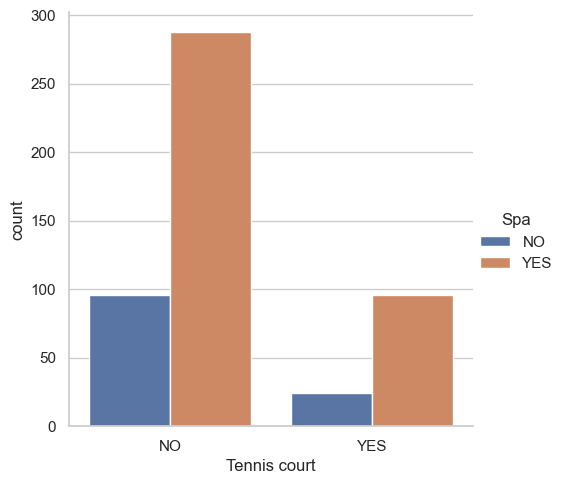

In [40]:
sns.catplot(x="Tennis court", data=reviews, kind="count", hue="Spa")

# Additional catplot() options

## Using different arguments

C:\Users\kurba\AppData\Local\Temp\ipykernel_42592\1356226827.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Traveler type", kind="count",
C:\Users\kurba\AppData\Local\Temp\ipykernel_42592\1356226827.py:1: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.catplot(x="Traveler type", kind="count",


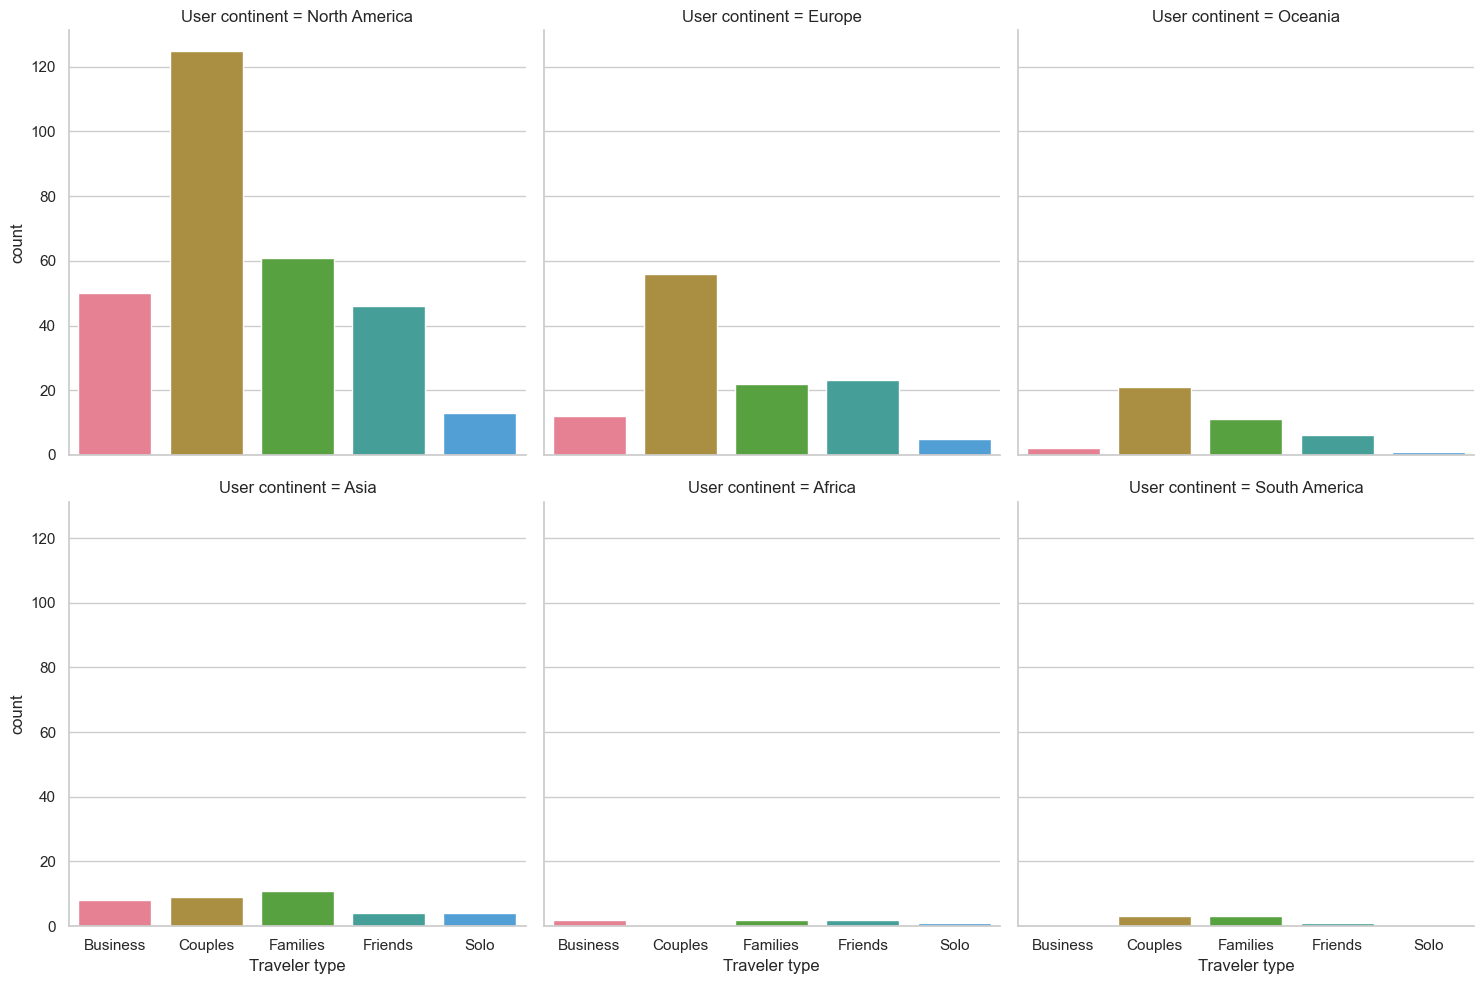

In [45]:
sns.catplot(x="Traveler type", kind="count",
col="User continent",
col_wrap=3,
#palette=sns.color_palette("Set2"), 
#palette=sns.color_palette("Paired"),
palette=sns.color_palette("husl"),
data=reviews)

http://seaborn.pydata.org/tutorial/color_palettes.html

## Updating plots
- Setup: save your graphic as an object: `ax`
- Plot title: `ax.fig.suptitle("My title")`
- Axis labels: `ax.set_axis_labels("x-axis-label", "y-axis-label")`
- Title height: `plt.subplots_adjust(top=.9)`

C:\Users\kurba\AppData\Local\Temp\ipykernel_42592\4133543185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x="Traveler type", col="User continent", col_wrap=3,
C:\Users\kurba\AppData\Local\Temp\ipykernel_42592\4133543185.py:1: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  ax = sns.catplot(x="Traveler type", col="User continent", col_wrap=3,


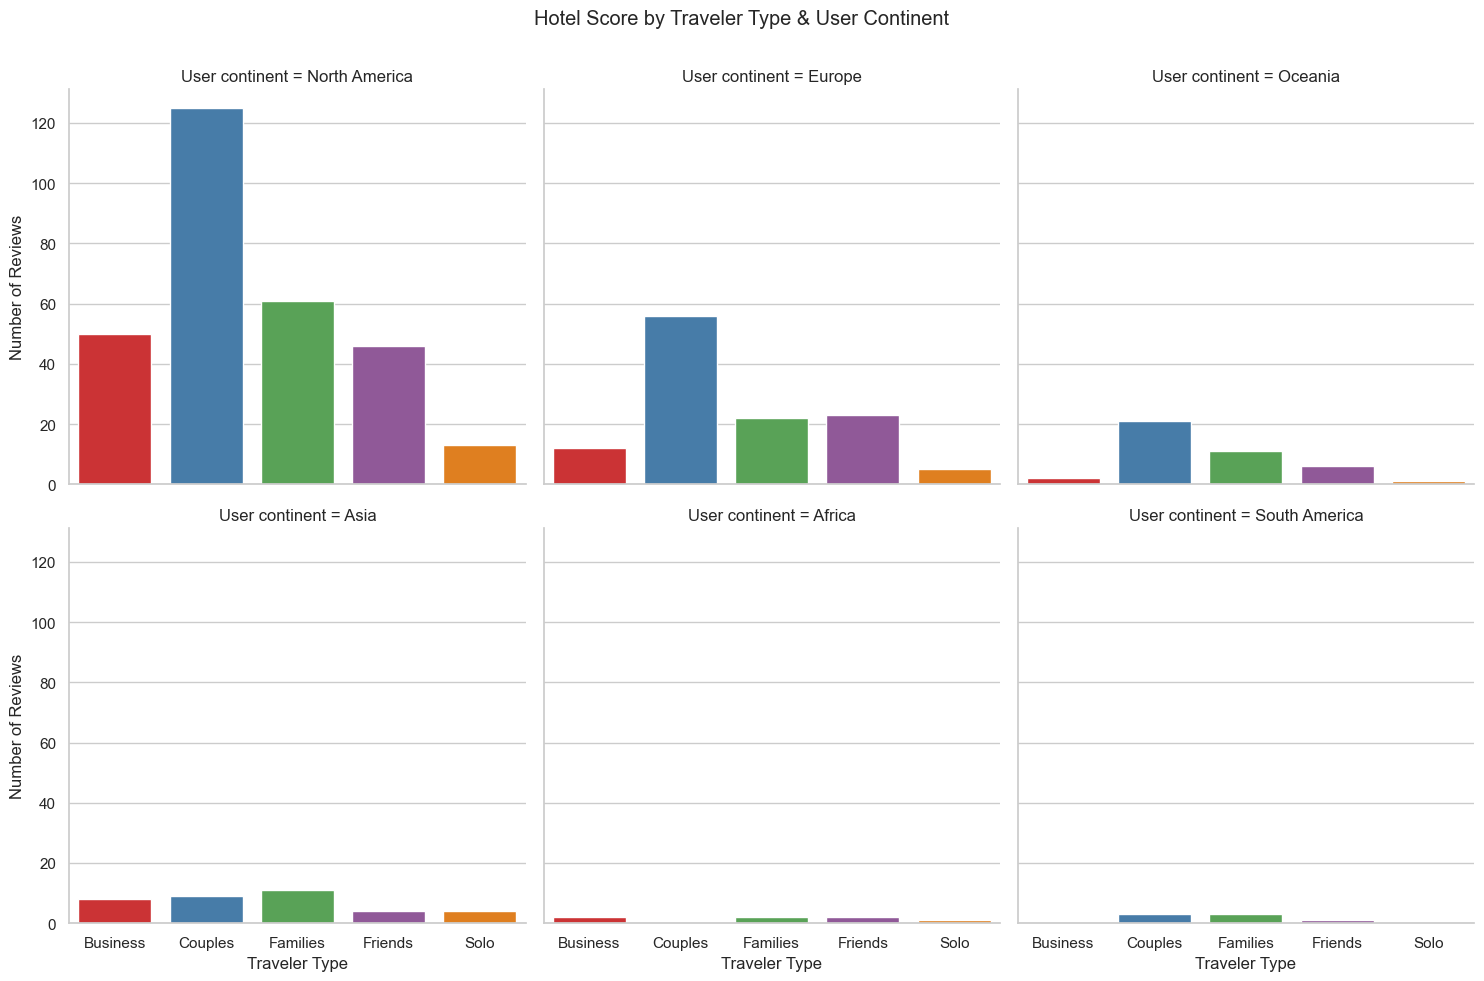

In [46]:
ax = sns.catplot(x="Traveler type", col="User continent", col_wrap=3,
kind="count", palette=sns.color_palette("Set1"), data=reviews)
ax.fig.suptitle("Hotel Score by Traveler Type & User Continent")
ax.set_axis_labels("Traveler Type", "Number of Reviews")
plt.subplots_adjust(top=.9)
plt.show()